In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sigmoid(z):
    
    g = 1 / (1 + np.exp(-z))
    
    return g

def compute_cost_logistic_regression(X, y, w, b):
    
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        
        loss = -(1-y[i]) * np.log(1 - sigmoid(np.dot(X[i], w) + b)) - y[i] * np.log(sigmoid(np.dot(X[i], w) + b))
        cost += loss
    
    cost = cost / m
    
    return cost

def compute_gradient_with_regularization(X, y, w, b, lambda_):
    
    m, n = X.shape
    w_copy = w
    b_copy = b
    
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        
        err = (sigmoid(np.dot(X[i],w) + b)) - y[i]
        
        for j in range(n):
            
            dj_dw[j] += err * X[i, j]
            
        dj_db += err
        
    
    for j in range(n):
        
        dj_dw[j] += (lambda_) * w[j]
        
    print(f"Cost : {compute_cost_logistic_regression(X, y, w, b)}")

    dj_dw = dj_dw / m
    dj_db = dj_db / m    
    
    
    return dj_dw, dj_db


def gradient_descent(X, y, w, b, alpha, lambda_, n_iters):
    
    w_copy = w
    b_copy = b
    
    for i in range(n_iters):
        dj_dw, dj_db = compute_gradient_with_regularization(X, y, w_copy, b_copy, lambda_)
        w_copy = w_copy - alpha * dj_dw
        b_copy = b_copy - alpha * dj_db
        
    return w_copy, b_copy
    

In [5]:
data = np.loadtxt('/Users/tanishqsharma/Desktop/Dev-Practice/machine-learning/self-exploration/data/wk3_ex2data1.txt',delimiter=',')

In [6]:
X_train = data[:,0:2]
y_train = data[:,2]

In [7]:
X_train[0]

array([34.62365962, 78.02469282])

In [8]:
y_train[0]

np.float64(0.0)

## Visualize

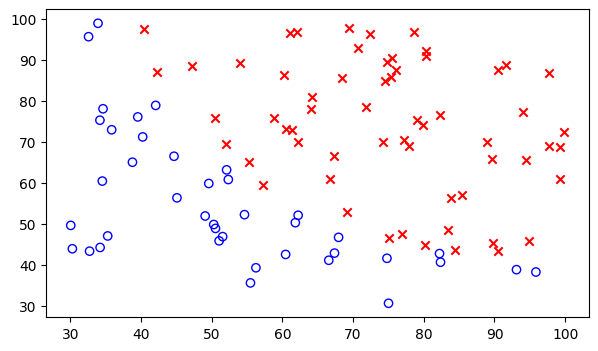

In [9]:
pos = y_train == 1
neg = y_train == 0
pos = pos.reshape(-1)
neg = neg.reshape(-1)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker = 'x', color = 'red')
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker = 'o', color = 'blue', facecolor = 'none')

In [10]:
w = np.array([1, 2])
b = 0.5
alpha = 0.001
lambda_ = 0.7
n_iters = 1000
w_final, b_final = gradient_descent(X_train, y_train, w, b, alpha, lambda_, n_iters)
print(w_final, b_final)

/var/folders/yr/_jfv6k1d3mbbs2syv46tt1y80000gn/T/ipykernel_14946/2337905317.py:14: RuntimeWarning: divide by zero encountered in log
  loss = -(1-y[i]) * np.log(1 - sigmoid(np.dot(X[i], w) + b)) - y[i] * np.log(sigmoid(np.dot(X[i], w) + b))
/var/folders/yr/_jfv6k1d3mbbs2syv46tt1y80000gn/T/ipykernel_14946/2337905317.py:14: RuntimeWarning: invalid value encountered in scalar multiply
  loss = -(1-y[i]) * np.log(1 - sigmoid(np.dot(X[i], w) + b)) - y[i] * np.log(sigmoid(np.dot(X[i], w) + b))


Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : nan
Cost : inf
Cost : inf
Cost : inf
Cost : 4.9669271401032775
Cost : 4.898280396628783
Cost : 4.822431719563186
Cost : 4.753044656273266
Cost : 4.686784218395762
Cost : 4.621262137888058
Cost : 4.557266180979595
Cost : 4.494302856779305
Cost : 

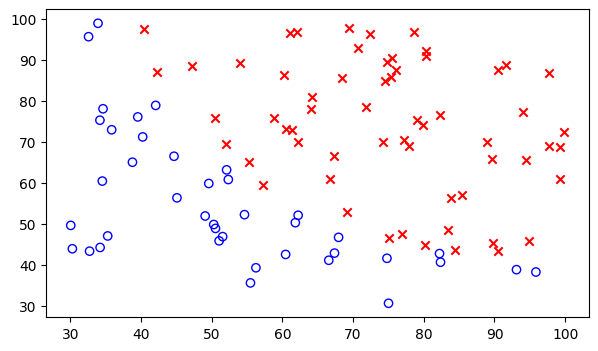

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker = 'x', color = 'red')
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker = 'o', color = 'blue', facecolor = 'none')

In [16]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.

dj_dw, dj_db  = compute_gradient_with_regularization(X_train, y_train, initial_w, initial_b, 0)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

Cost : 0.6931471805599458
dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


In [17]:
X_train.reshape(-1,2).shape[1]

2

In [18]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost_logistic_regression(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


Cost at test w,b: 0.218


## Evaluating logistic regression

In [34]:
def predict(X, w, b):
    
    m = X.shape[0]
    y_pred = np.zeros(m)
    
    for i in range(m):
        y_pred[i] = sigmoid(np.dot(X[i], w) + b)
    
        if y_pred[i] > 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
        
    return y_pred


def predict2(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
    ### END CODE HERE ### 
    return p

In [22]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (4,), value [0. 1. 1. 1.]


In [32]:
data = np.loadtxt('/Users/tanishqsharma/Desktop/Dev-Practice/machine-learning/self-exploration/data/wk3_ex2data1.txt', delimiter=',')
X_train = data[:,0:2]
y_train = data[:,2]

In [35]:
#Compute accuracy on our training set
p = predict2(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 60.000000


In [30]:
y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
predict(X_train, w,b)

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

## Regularized logistic regression

In [145]:
data = np.loadtxt('/Users/tanishqsharma/Desktop/Dev-Practice/machine-learning/self-exploration/data/wk3_ex2data2.txt', delimiter=',')

In [146]:
X_train = data[:,0:2]
y_train = data[:,2]

In [147]:
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [148]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


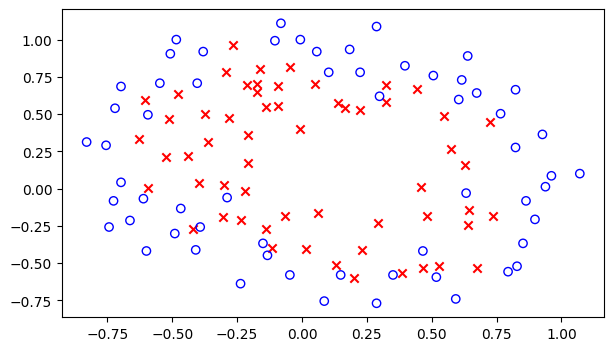

In [149]:
pos = y_train == 1
neg = y_train == 0

pos = pos.reshape(-1)
neg = neg.reshape(-1)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.scatter(X_train[pos,0], X_train[pos,1], marker = 'x', color = 'red')
ax.scatter(X_train[neg,0], X_train[neg,1], marker = 'o', color = 'blue', facecolor='none')

In [150]:
def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [151]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [152]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [188]:
import math
def compute_cost_logistic_regression(X, y, w, b):
    
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        
        loss = -(1-y[i]) * np.log(1 - sigmoid(np.dot(X[i], w) + b)) - y[i] * np.log(sigmoid(np.dot(X[i], w) + b))
        cost += loss
    
    cost = cost / m
    
    return cost

def compute_cost_lr_reg(X, y, w, b, lambda_):
    
    m = X.shape[0]
    
    cost = 0
    
    for i in range(m):
        
        fx_i = sigmoid(np.dot(X[i], w) + b)
        loss = - (1 - y[i]) * np.log(1 - fx_i) - y[i] * np.log(fx_i)
        
        cost += loss
    
    # cost = compute_cost_logistic_regression(X, y, w, b)
    
    cost = cost / m
        
    reg_cost = 0.
    
    reg_cost = (sum(np.square(w)) * lambda_ )/ (2*m)
    
    total_cost = cost + reg_cost
    
    return total_cost 

def compute_gradient_reg(X, y, w, b, lambda_):
    
    m,n = X.shape
    
    dj_dw = np.zeros(n)
    dj_db = 0.
    
    for i in range(m):
        
        fx_i = sigmoid(np.dot(X[i], w) + b)
        err = fx_i - y[i]
        
        for j in range(n):
            dj_dw[j] += err * X[i, j]
            
        dj_db += err
        
    
    for j in range(n):
        
        dj_dw[j] += lambda_ * w[j]
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db


def gradient_descent_reg(X, y, w, b, alpha, lambda_, n_iters):
    
    J_history = []
    w_history = []
    
    for i in range(n_iters):
        
        dj_dw, dj_db = compute_gradient_reg(X, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            cost = compute_cost_lr_reg(X, y, w, b, lambda_)
            J_history.append(cost)
            
        if i % math.ceil(n_iters/10) == 0 or i == (n_iters - 1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [189]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_lr_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.6618252552483948


In [190]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_dw, dj_db  = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.07138288792343656
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.01140985288328012, 0.0536273463274574, 0.0031402782673134633]


In [191]:
X_mapped[0]

array([5.12670000e-02, 6.99560000e-01, 2.62830529e-03, 3.58643425e-02,
       4.89384194e-01, 1.34745327e-04, 1.83865725e-03, 2.50892595e-02,
       3.42353606e-01, 6.90798869e-06, 9.42624411e-05, 1.28625106e-03,
       1.75514423e-02, 2.39496889e-01, 3.54151856e-07, 4.83255257e-06,
       6.59422333e-05, 8.99809795e-04, 1.22782870e-02, 1.67542444e-01,
       1.81563032e-08, 2.47750473e-07, 3.38066048e-06, 4.61305487e-05,
       6.29470940e-04, 8.58939846e-03, 1.17205992e-01])

In [192]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent_reg(X_mapped, y_train, initial_w, initial_b, 
                                    alpha, lambda_, iterations)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


In [123]:
X_test = np.array(X_train, dtype=float)

In [178]:
initial_w

array([[-0.00082978],
       [ 0.00220324]])

In [187]:
J_history

[np.float64(0.7210188345400222),
 np.float64(0.7203615693946793),
 np.float64(0.7197081291377029),
 np.float64(0.7190584932016424),
 np.float64(0.7184126410768706),
 np.float64(0.7177705523122788),
 np.float64(0.7171322065159632),
 np.float64(0.7164975833558915),
 np.float64(0.7158666625605576),
 np.float64(0.7152394239196196),
 np.float64(0.7146158472845257),
 np.float64(0.7139959125691195),
 np.float64(0.7133795997502406),
 np.float64(0.7127668888682993),
 np.float64(0.7121577600278479),
 np.float64(0.7115521933981289),
 np.float64(0.7109501692136162),
 np.float64(0.710351667774536),
 np.float64(0.7097566694473796),
 np.float64(0.7091651546654004),
 np.float64(0.708577103929095),
 np.float64(0.7079924978066747),
 np.float64(0.7074113169345205),
 np.float64(0.7068335420176293),
 np.float64(0.7062591538300393),
 np.float64(0.7056881332152531),
 np.float64(0.7051204610866377),
 np.float64(0.7045561184278194),
 np.float64(0.7039950862930622),
 np.float64(0.7034373458076353),
 np.float64(

## Solved the assignment for logistic regression using regularization by building functions